---

Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Arbi Kodraj](https://github.com/ArbiKodraj/desktop-tutorial) 

# Replication of Philip Oreopoulos (2011)

---

This notebook contains my replication of the results from the following paper:

>Philip Oreopoulos (2011). "Why Do Skilled Immigrants Struggle in the Labor Market? A Field Experiment with Thirteen Thousand Resumes." American Economic Journal: Economic Policy 3, 148–171.

<i><b>  Downloading and viewing this notebook: </b> </i> 

- The best way to view this notebook is by downloading the repository from GitHub. Other viewing options like MyBinder or NBViewer may have issues with displaying images or coloring of certain parts.


- The original paper, as well as the data and code provided by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/pol.3.4.148 "American Economic Association").

<i><b> Information about replication and individual contributions: </i></b>

- For the replication, I try to stick to the original structure of the paper so that readers can easily follow along and compare. Tables and figures are named and labeled as they appear in Oreopoulos (2011).


- For transparency, all sections in the replication that constitute independent contributions by me and are not part of results presented (or include deviations from the methods used) in the paper are marked as extensions.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Job-Applicant-Discrimination" data-toc-modified-id="Job-Applicant-Discrimination-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Job-Applicant Discrimination</a></span></li><li><span><a href="#Research-Design" data-toc-modified-id="Research-Design-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Research Design</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Results-of-Replication" data-toc-modified-id="Results-of-Replication-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Results of Replication</a></span></li><li><span><a href="#Results-of-Extension" data-toc-modified-id="Results-of-Extension-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Results of Extension</a></span><ul class="toc-item"><li><span><a href="#Regression-estimators-of-causal-effects" data-toc-modified-id="Regression-estimators-of-causal-effects-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Regression estimators of causal effects</a></span></li><li><span><a href="#Supervised-Classification" data-toc-modified-id="Supervised-Classification-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Supervised Classification</a></span></li></ul></li></ul></li><li><span><a href="#Discussing-Results-with-Recruiters" data-toc-modified-id="Discussing-Results-with-Recruiters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Discussing Results with Recruiters</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from IPython.display import display_html, HTML

In [2]:
from auxiliary_desciptive_replication import *
from auxiliary_results_replication import *
from auxiliary_results_extension import *

---
## Introduction

---

<p style="text-align: justify">
In his paper "Why Do Skilled Immigrants Struggle in the Labor Market? A Field Experiment with Thirteen Thousand Resumes", Oreopoulos (2011) investigates why highly qualified immigrants have difficulties in emancipating themselves in the Canadian labor market despite various political measures, for example the points system. To this purpose, several thousand randomly manipulated applications were sent to employers with open job offers in Toronto. The resumes were categorized into four types, which on average differed in only one characteristic (for example origin of name), in order to be able to state as precisely as possible which factors are relevant for the assessment of the happening. Using <b>linear regressions</b>, Oreopoulos was able to find out that applicants who have a foreign sounding name such as Indian, Chinese, Pakistani and even Greek or foreign work experience are significantly disadvantaged in a variety of professions compared to identical applicants with domestic work experience and English names. The listing of other relevant characteristics such as fluency in a foreign language, work experience in international companies or even an additional Canadian Master degree did not significantly weaken the effect. Following the experiment, recruiters were asked what the possible reason for the decision was. The most common reason cited was uncertainty about the language skills of foreign applicants and the resulting expected loss of productivity. However, recruiters were not able to name any additional competencies whose listing could compensate for their concerns about the lack of language skills. 
</p>
<p style="text-align: justify">
This notebook is going to follow the same structure as Oreopoulos publication. First, the relevance of the question will be put into a historical context by listing some facts concerning the development of the labor market in Canada. Within this context, I will include further studies that provide supporting evidence. Nevertheless, I will try to follow the approach of Oreopoulos as strictly as possible. Following on from this, theories concerning possible causes of job discrimination will be presented. In addition, I will briefly discuss what drives a recruiter to make a selection or on what basis recruiters decide to choose a particular applicant. Supplementary publications will also be considered in order to give the theories a touch of legality.
</p>
<p style="text-align: justify">
Afterwards the experiment will be discussed. The structure will be briefly described. In chapter 4 I will mainly focus on the reproduction of the construction of the resumes. In other words, I will describe how Oreopoulos has designed the underlying resumes, how he has defined the characteristics, how resumes differ from each other on average, how he has identified the names, professions, universities, etc. and how the regression should be performed. In the course of this I will replicate the first descriptive results.
</p>
<p style="text-align: justify">
Chapter 5 is divided into two parts. In the first part I will reproduce the results of x and critically examine and visualize them with additional methods. The set up regression is to be applied conditionally to various and all character traits as well as absolutely. The category (constellation of diverse characteristics) of the resumes is to be used as an independent variable, whereas the positive feedback - measured by the employer's recall - is to be defined as a dependent and thus explainable variable. In the second part I will expand the results by applying additional methods. For this I will use the <a href="https://scikit-learn.org/stable/">sckit-learn</a> library. In the sixth chapter, I will briefly discuss how recruiters justified their behavior after Oreopoulos responded to the results. 
</p>
<p style="text-align: justify">
Finally, I will briefly summarize the fundamental findings of the author discussed earlier and put them into context with my additional results. I will then briefly discuss the policy intervention measures proposed by Oreopoulos, derived from the main results, to reduce discrimination. 
</p>

---
## Background


---

<p style="text-align: justify">
As Oreopoulos (2011) pointed out, recent immigrants in Canada struggle in the labor market. In 2006, their unemployment rate was twice as high as of the people born in Canada. Since then, the ratio did not really change. According to the <a href="https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1410008201#timeframe">Canadian Census</a>, in October 2019 the unemployment rate of recent immigrants (immigrants landed five or less years earlier) equaled teen percent whereas the unemployment rate of the similar aged non-immigrants equaled 5.2 percent. Complementary, the probability of being unemployed in Germany is initially 7 percentage points higher for recently arrived immigrants than for natives with the same characteristics (Beyer 2017). Intriguingly, the unemployment rate of immigrants that landed more than five years earlier does not significantly differ from the non-immigrants unemployment rate. This might attribute to the variation in the effect of human capital. Since unemployment rates vary considerably for immigrants depending on their skills and qualifications (Drinkwater 2017), former immigrants seem to have a skill advantage referring to language abilities. In addition to that, new migrants tend to be disadvantaged compared to former ones with respect to country-specific knowledge (including poorer knowledge of the host country's customs and being less likely to hold relevant occupational licenses) and information about labor market opportunities (Drinkwater 2017).
</p>

>The following Dataframe is generated by the provided informations of the Canadian Census and lists the unemployment rate of the described groups from 2015 to 2019. 

In [3]:
unem_rate()                                             

,2015,2016,2017,2018,2019
Total population,5.8,6.0,5.4,4.9,4.7
"Immigrants, landed 5 or less years earlier",10.9,10.2,9.6,8.6,8.8
"Immigrants, landed more than 5 to 10 years earlier",8.0,7.7,6.2,5.3,5.1
"Immigrants, landed more than 10 years earlier",5.6,5.9,5.6,5.0,4.7
Born in Canada,5.4,5.5,5.0,4.5,4.3


<p style="text-align: justify">
Furthermore, turning to wages, Oreopoulos also provides some insights about the earning differences in Canadian dollars between recent immigrants and native aged, as seen in the dataframe below. The first row invites all individuals from the 2006 Public-Use Canadian Census, aged 25-39. The next two rows refer to individuals with positive earnings. Compared to native-born workers, median wages of recent immigrants are 36 percent and mean wages 31 percent lower. These results are consistent with Beyer's (2017) findings, who documented that employed immigrants in Germany initially earn 20 percent less than employed natives with otherwise identical characteristics. As Frenette and Morissette (2005) figured out, the wage gap seems to narrow as time passed. So does the unemployment rate, as one can see above. Thus, by time, skill sets between recent immigrants and non-immigrants might converge. 
</p>

In [4]:
first_table()

,Non-immigrants,Recent immigrants (0-4 years),Sample size
Unemployment rate,0.059,0.104,127149
Mean earnings for positive earners in labor force,39.800,27.500,119275
Median earnings for positive earners in labor force,33.000,21.000,199275


<p style="text-align: justify"> 
However, considering that Canadian policy focuses on attracting immigrants with superior abilities in order to compensate skilled labor force shortage, recent immigrants still underlie tremendous disadvantages. Canada is the first country that introduced a point-based system in 1967 in order to distinguish between skilled and other kind of immigrants <a href="https://www.bbc.com/news/uk-politics-29594642">link</a> based on their highest degree, language ability, age, work-experience in or outside Canada and whether they have cash in hand (Oreopoulos, 2011). This system had a direct, large impact on the economy (Alan G. Green and David A. Green 1995) since the overall percentage of recent immigrants with a Bachelor degree or higher equals 52% (Statistics Canadian Census 2016). An issue from the political perspective might be that, since superior immigrants are not assimilating in the highly skilled labor marked, immigrants do not boost the economic growth as excepted. That would impact government transfer programs (Oreopoulos, 2011). By time, evermore countries are paying attention to a point system and have been introduced one. Therefore, at least from the political view, it is quit reasonable to examine, why the eldest point system introduced by Canada does not have its favored effect.
</p>
<p style="text-align: justify"> 
One reason for that may be that immigrants face more obstacles in the labor market than native workers, and that these obstacles are overcome only incremental and never full (Beyer, 2017). Also, employers may not value foreign education as much as Canadian education or may treat foreign experience as inferior to Canadian experience. Another reason is that cultural and language differences have grown. Ancillary, the point system indeed examines whether an immigrant is qualified with respect to education but does not vet their social etiquettes (Oreopoulos, 2011).
</p>
<p style="text-align: justify">
Oreopoulos (2011) presents results from an audit study so as to investigate why immigrants arriving under the point system struggle in the labor market. After randomly sampling characteristics, Oreopoulos submitted thousands of resumes to online job postings across multiple professions in Toronto in order to detect what affects employer decisions for contacting the applicant. One advantage of using resumes is that the investigator knows exactly what information employers have when they make the decision to contact a candidate. The resumes have been drafted in such a way that they plausibly represent the most recent immigrants according to the point system from China, Indian Pakistan and the UK, as well as non-immigrants with and without ethnic sounding names (including Greek names). The study also randomized where applicants received their Bachelor's degrees, whether their work experience was gained in Toronto or foreign cities, whether it came from international companies, whether they were fluent in several languages (including French), whether they had additional educational credentials, whether they were recognized by a Canadian agency, whether their resumes with foreign experience contained Canadian references or permanent residency status, and whether they had extracurricular activities. Oreopoulos wants to expand a related study by Bertrand and Mullainathan (2004) that found out that job applicants with African-American names get far fewer callbacks for each resume they send out than the applicants with same resumes and white-sounding names.
</p>

---
## Job-Applicant Discrimination


---
<p style="text-align: justify"> 
The audit study used by Oreopoulos (2011) helps to quantify the extent to which characteristics such as experience, education and out-of-school experience influence the reactions of potential employers. It can also reveal statistical discrimination that occurs when employers misuse observable characteristics to infer unobservable information (Edmund S. Phelps, 1972). For instance, employers use applicant names to mistakenly predict their language skills and decide, based on the prediction, whom to interview. Employers also choose according to productivity exceptions that they conclude based on the known informations provided by the resume. Since productivity exceptions are determined conditional on other informations, adding further informations that do not correlate with the listed ones should reduce employers uncertainty (Oreopoulos, 2011). In addition to that, the callback gap between foreign named or educated resumes and native resumes should disappear by providing informations that are related to unobservable skills, given employers discriminate statistically. Oreopoulos points out that another prediction of statistically discrimination is that the callback rate gap between foreign named or educated resumes and native resumes should be larger in cases where jobs applied to require more of the skills being concluded from the name or immigrant status. Consequently, for jobs like Software Development that require less language skills, the callback rate is expected to be relatively small. 
</p>
<p style="text-align: justify">     
Randomly designed resumes across a wide set of characteristics such as speaking skills and social skills should generate similar reactions to employers in average. If racial differences remain, Oreopoulos (2011) concludes that employers may prefer hiring individuals from particular groups, independent of the characteristics or that employers decide whether to call back based on unconscious mistakes generated by unconditional biases or stereotypes. A distinction is made between explicit and implicit observations. Explicit ones follow from underlying information, while implicit views are subconscious associations that exhibit incongruent behavior from employer since they make decisions against their own conscience. Implicit negative attitudes toward Blacks have been shown in a variety of studies (Christian Crandall and Amy Eshleman, 2003). Employers that believe they are rejecting applicants because of lack of skills actually are subject to their implicit biases (Christian Crandall and Amy Eshleman, 2003). Recruiters use unconditional productivity expectations to decide whether to recall the applicant, rather than basing the decision on observable characteristics that can be drawn from the resume. 
</p>
<p style="text-align: justify">     
Implicit discriminating can also occur from thinking in categories. Categories implicitly provide rich additional descriptions that allow making mistakenly predictions about a person that is not observed (Mullainathan, 2002). Experiences that occur less frequently in the population are more roughly categorised (Mullainathan, 2002). Consequently, minorities are discriminated even though there are no bad intentions. Especially employers who are not familiar with foreign names or educations tend to categories tough other characteristics that are listed in the resumes should compensate concerns about language skills. 
</p>
<p style="text-align: justify">  
At the end, Oreopoulos investigates why callback differences exist despite several listed attributes by asking why others might discriminate and whether the behavior is deliberative or not.
</p>

---
## Research Design


---
<p style="text-align: justify"> 
Oreopoulos randomly constructed thousands of resumes that represent typical immigrants who arrived recently under the Canadian Point system after consulting actual resumes of recent immigrants and online job submissions. The resumes were mainly sent to employers that were looking for employees across several occupations in the area of Toronto between April and November 2008. A further set of resumes was sent across Montreal and Toronto between February and September 2009 so as to examine effects from adding other attributes. The resumes involve immigrants from China, India, Pakistan and Britain as well as non-immigrants with and without ethnic-sounding names (including Greek names). The job sample demanded three to seven years of experience and an undergraduate degree. 
</p>

Once a job posting was found, four resumes were sent in a random order to the employer via direct email over a two-to-three-day period.
  

> - The first resume represented an applicant with a popular English sounding name, Canadian undergraduate education, and Canadian experience - **Type 0**
> - The second resume represented an applicant with a popular foreign sounding name (Chinese, Indian, Pakistani, or Greek), Canadian undergraduate education and Canadian experience - **Type 1** 
> - The third included a popular foreign sounding name (Chinese, Indian, or Pakistani), corresponding foreign undergraduate degree and Canadian experience - **Type 2**
> - The fourth included a popular foreign sounding name, foreign education, and some foreign experience - **Type 3** - or all foreign experience - **Type 4**

<p style="text-align: justify">    
Furthermore, Oreopoulos randomized the school from which the applicants graduated, the underlying multiple language competence, whether they had additional Canadian educational credentials and whether their experience was from multinational or large firms. A subset of Type 3 and 4 resumes were randomized in order to list Canadian references and permanent residency status. The names were randomly picked from a a list of popular names. The common Canadian surname comes from an article titles "Common Surnames", <i>CBC News</i>, July 26, 2007 and was accessed March 12, 2008. The link is not available anymore. The most popular Chinese names were collected from <a href="https://zhidao.baidu.com/question/41504421.html">here</a>, whereas the most popular Indian names were gathered from <a href="https://www.learnreligions.com/favorite-hindi-baby-names-and-their-meanings-4140479">here</a>. 
</p> 


>The table below shows the number of sent resumes grouped by name ethnicity and names. It also differs between male and female names. It is the replication of Table 2A. The left table shows the distribution of the male names whereas the right one displays the randomly picked female names. It is the replication of Table 2B.

<p style="text-align: justify"> 
    The British male-name <i>Greg Johnson</i>, for instance, occurs 37 times as type 2, 36 times in type 3 and 33 times in Type 4. In contrast, the Chinese female-name <i>Fang Wang</i> appears 58 times in Type 1, 43 times in Type 2, 48 times in Type 3 and 34 times in Type 4. <i>Allen Wan</i>, who has a Chinese name and Canadian surname, occurs 59 times as Type 1, 25 Times as Type 2, twenty times as Type 3 and twenty times as Type 4. 
</p> 

In [5]:
second_tableA()

Type 0 
 Type 1 
 Type 2 
 Type 3 
 Type 4 
 
 
 Name ethnicity 
 Names 
 
 
 
 
 
 
 
 
 
 British 
 GregJohnson 
 
 
 37 
 36 
 33 
 
 
 JohnMartin 
 
 
 47 
 34 
 35 
 
 
 MatthewWilson 
 
 
 38 
 37 
 36 
 
 
 MichaelSmith 
 
 
 56 
 33 
 30 
 
 
 Canada 
 GregJohnson 
 394 
 
 
 
 
 
 
 JohnMartin 
 423 
 
 
 
 
 
 
 MatthewWilson 
 404 
 
 
 
 
 
 
 MichaelSmith 
 261 
 
 
 
 
 
 
 Chinese 
 DongLiu 
 
 154 
 99 
 74 
 79 
 
 
 LeiLi 
 
 128 
 86 
 96 
 87 
 
 
 TaoWang 
 
 58 
 36 
 45 
 34 
 
 
 YongZhang 
 
 142 
 90 
 100 
 75 
 
 
 Chn-Cdn 
 AllenWang 
 
 59 
 25 
 20 
 20 
 
 
 BillZhang 
 
 58 
 18 
 21 
 37 
 
 
 EricWang 
 
 93 
 59 
 45 
 37 
 
 
 JackLi 
 
 38 
 17 
 15 
 19 
 
 
 JamesLiu 
 
 49 
 25 
 22 
 21 
 
 
 Greek 
 LukasMinsopoulos 
 
 168 
 
 
 
 
 
 Indian 
 ArjunKumar 
 
 136 
 108 
 102 
 89 
 
 
 PanavSingh 
 
 150 
 107 
 79 
 76 
 
 
 RahulKaur 
 
 164 
 108 
 94 
 76 
 
 
 SamirSharma 
 
 143 
 90 
 82 
 81 
 
 
 Pakistani 
 AliSaeed 
 
 55 
 23 
 13 
 29 
 
 
 AsifSheikh 
 
 63 
 19 
 23 
 25 
 
 
 ChaudhryMohammad 
 
 43 
 19 
 20 
 16 
 
 
 HassanKhan 
 
 63 
 18 
 23 
 23 
 
 
 
 
 
 
 
 Type 0 
 Type 1 
 Type 2 
 Type 3 
 Type 4 
 
 
 Name ethnicity 
 Names 
 
 
 
 
 
 
 
 
 
 British 
 AlisonJohnson 
 
 
 40 
 29 
 37 
 
 
 CarrieMartin 
 
 
 38 
 35 
 28 
 
 
 EmilyBrown 
 
 
 48 
 41 
 58 
 
 
 JillWilson 
 
 
 42 
 24 
 42 
 
 
 Canada 
 AlisonJohnson 
 422 
 
 
 
 
 
 
 CarrieMartin 
 441 
 
 
 
 
 
 
 EmilyBrown 
 254 
 
 
 
 
 
 
 JillWilson 
 427 
 
 
 
 
 
 
 Chinese 
 FangWang 
 
 58 
 43 
 48 
 34 
 
 
 MinLiu 
 
 150 
 92 
 108 
 82 
 
 
 NaLi 
 
 132 
 101 
 90 
 69 
 
 
 XiuyingZhang 
 
 176 
 104 
 75 
 103 
 
 
 Chn-Cdn 
 AmyWang 
 
 44 
 26 
 16 
 18 
 
 
 JenniferLi 
 
 49 
 27 
 22 
 17 
 
 
 MichelleWang 
 
 96 
 59 
 46 
 56 
 
 
 MonicaLiu 
 
 63 
 26 
 23 
 22 
 
 
 VivianZhang 
 
 69 
 20 
 21 
 28 
 
 
 Greek 
 NicoleMinsopoulos 
 
 198 
 
 
 
 
 
 Indian 
 MayaKumar 
 
 142 
 99 
 88 
 75 
 
 
 PriyankaKaur 
 
 166 
 92 
 109 
 80 
 
 
 ShreyaSharma 
 
 135 
 93 
 83 
 98 
 
 
 TaraSingh 
 
 131 
 114 
 80 
 83 
 
 
 Pakistani 
 FatimaSheikh 
 
 54 
 17 
 15 
 25 
 
 
 HinaChaudhry 
 
 73 
 17 
 30 
 21 
 
 
 RababSaeed 
 
 51 
 21 
 8 
 14 
 
 
 SanaKhan 
 
 64 
 22 
 16 
 34

<p style="text-align: justify"> 
Next, Oreopoulos provides the number of those individuals who got a callback grouped as before. For example, the individual <i>Allen Wan</i>, who has a Chinese name and Canadian surname, got sixteen callbacks as Type 1, zero callbacks as Type 2, three callbacks as Type 3 and one callback as Type 4. The Canadian name <i>Greg Johnson</i> got 47 callbacks as Type 0.
</p> 

In [6]:
second_tableB()

Type 0 
 Type 1 
 Type 2 
 Type 3 
 Type 4 
 
 
 Name ethnicity 
 Names 
 
 
 
 
 
 
 
 
 
 British 
 GregJohnson 
 
 
 3 
 2 
 4 
 
 
 JohnMartin 
 
 
 5 
 3 
 4 
 
 
 MatthewWilson 
 
 
 2 
 5 
 3 
 
 
 MichaelSmith 
 
 
 3 
 4 
 1 
 
 
 Canada 
 GregJohnson 
 47 
 
 
 
 
 
 
 JohnMartin 
 48 
 
 
 
 
 
 
 MatthewWilson 
 50 
 
 
 
 
 
 
 MichaelSmith 
 29 
 
 
 
 
 
 
 Chinese 
 DongLiu 
 
 16 
 3 
 11 
 2 
 
 
 LeiLi 
 
 15 
 7 
 7 
 8 
 
 
 TaoWang 
 
 7 
 5 
 4 
 3 
 
 
 YongZhang 
 
 15 
 9 
 6 
 5 
 
 
 Chn-Cdn 
 AllenWang 
 
 7 
 
 3 
 1 
 
 
 BillZhang 
 
 4 
 1 
 2 
 4 
 
 
 EricWang 
 
 9 
 2 
 4 
 
 
 
 JackLi 
 
 
 1 
 1 
 1 
 
 
 JamesLiu 
 
 4 
 1 
 2 
 1 
 
 
 Greek 
 LukasMinsopoulos 
 
 18 
 
 
 
 
 
 Indian 
 ArjunKumar 
 
 13 
 13 
 3 
 5 
 
 
 PanavSingh 
 
 10 
 15 
 7 
 2 
 
 
 RahulKaur 
 
 15 
 10 
 6 
 5 
 
 
 SamirSharma 
 
 14 
 7 
 9 
 4 
 
 
 Pakistani 
 AliSaeed 
 
 3 
 6 
 
 1 
 
 
 AsifSheikh 
 
 5 
 
 
 
 
 
 ChaudhryMohammad 
 
 3 
 1 
 2 
 
 
 
 HassanKhan 
 
 7 
 1 
 
 
 
 
 
 
 
 
 
 Type 0 
 Type 1 
 Type 2 
 Type 3 
 Type 4 
 
 
 Name ethnicity 
 Names 
 
 
 
 
 
 
 
 
 
 British 
 AlisonJohnson 
 
 
 5 
 5 
 5 
 
 
 CarrieMartin 
 
 
 6 
 6 
 3 
 
 
 EmilyBrown 
 
 
 8 
 6 
 6 
 
 
 JillWilson 
 
 
 2 
 3 
 7 
 
 
 Canada 
 AlisonJohnson 
 66 
 
 
 
 
 
 
 CarrieMartin 
 82 
 
 
 
 
 
 
 EmilyBrown 
 38 
 
 
 
 
 
 
 JillWilson 
 69 
 
 
 
 
 
 
 Chinese 
 FangWang 
 
 11 
 5 
 5 
 2 
 
 
 MinLiu 
 
 19 
 9 
 11 
 10 
 
 
 NaLi 
 
 9 
 11 
 8 
 2 
 
 
 XiuyingZhang 
 
 16 
 6 
 7 
 5 
 
 
 Chn-Cdn 
 AmyWang 
 
 8 
 1 
 1 
 
 
 
 JenniferLi 
 
 3 
 3 
 1 
 
 
 
 MichelleWang 
 
 12 
 4 
 2 
 2 
 
 
 MonicaLiu 
 
 9 
 2 
 1 
 
 
 
 VivianZhang 
 
 5 
 2 
 1 
 2 
 
 
 Greek 
 NicoleMinsopoulos 
 
 19 
 
 
 
 
 
 Indian 
 MayaKumar 
 
 19 
 8 
 6 
 2 
 
 
 PriyankaKaur 
 
 13 
 11 
 6 
 4 
 
 
 ShreyaSharma 
 
 16 
 12 
 5 
 6 
 
 
 TaraSingh 
 
 20 
 12 
 4 
 6 
 
 
 Pakistani 
 FatimaSheikh 
 
 4 
 1 
 2 
 2 
 
 
 HinaChaudhry 
 
 6 
 3 
 1 
 1 
 
 
 RababSaeed 
 
 3 
 1 
 
 
 
 
 SanaKhan 
 
 6 
 4 
 2

<p style="text-align: justify"> 
Yahoo and Gmail were used for setting up the email addresses. The total sample size equals 12,910. Since 4 resumes were sent to one job, the job posting size is 3225. Small changes between applicant descriptions were used to  eradicate similarities, but Oreopoulos still tried to obtain the overall form and content. The listed city was either Mississauga, Toronto, Beijing, Shanghai, Guangzhu, New Delhi, Mumbai, Punjab, or London. 20 occupations categories were included, for each category, Oreopoulos created four different experience sets and assigned the job title and corresponding description to one of the four resumes sent to a single employer. 
</p>

> **The 20 occupation categories were:** Administrative, Insurance, Arts and Media, Biotech-Pharmaceutical, Marketing, e-Commerce, Production, Education, Retail, Maintenance, Programmer, Civil Engineering, Electrical Engineering, Executive, Finance, Technology, Human Resources, Computer, Healthcare, and Hospitality. All occupations came from [workopolis.com](https://www.workopolis.com/en/) or [jobbank.ca](http://w3.jobbank.ca).

<p style="text-align: justify"> 
In addition to that, Oreopoulos tried to maintain the sameness of experience sets by choosing international companies (e.g ABC Inc., Toronto versus ABC Inc., Mumbai) or, at least, highly related companies in size and industry. University requirements for employment were satisfied for each application. Hence, in average, resumes across immigrants and non-immigrants are the same.
</p>

> The Next Data Frame Shows The Proportion Of Resumes Sent With Particular Characteristics By Resume Type. It is the replication of table 3 in Oreopoulos study.

<p style="text-align: justify">
Approximately half of the individuals were females and more than half of the universities were listed in the 2008 QS World University Rankings' Top 200. The remaining ones were less prestigious. 20 percent of the resumes, except for Type 4, were randomly matched to an additional occupation specific Canadian master's degree in order to check, whether additional Canadian education may offset the lack of foreign experience and schooling. Accreditation of resumes were also assigned randomly for Type 2, Type 3 and Type 4 resumes. As shown below, in average 7.83 percent of the resumes for Type 2, Type 3 and Type 4 were featured with an accreditation. Roughly 30 percent of all resumes for all Types were suited with high quality work experience such as working for a large firm. Among all Types, roughly 24 percent are fluent in French and other languages and 60 percent were featured with extra curricular activities. Also, some foreign typed resumes got a  permanent resident. The table on the right gives an insight into the distribution of the origin of the name composition. For instance, 27.6 percent of the Type 1 resumes were assigned with a Chinese fore- and surname. These differences in assignments allow Oreopoulos to quantify the importance of characteristic sets for evaluating an applicant. More importantly, they enable me as part of the extension to analyze the effect of certain characteristics on the callback rate.
</p>





In [7]:
third_table()

,Full sample,Type 0,Type 1,Type 2,Type 3,Type 4
Charactersistics of resume,,,,,,
Female,0.509,0.510,0.512,0.504,0.498,0.517
Top 200 world ranking university,0.538,0.590,0.643,0.457,0.451,0.447
Extra curricular activities listed,0.602,0.600,0.605,0.596,0.592,0.613
Fluent in French and other languages,0.246,0.247,0.255,0.243,0.243,0.230
Canadian master’s degree,0.170,0.205,0.196,0.205,0.198,0.000
High quality work experience,0.312,0.331,0.313,0.302,0.297,0.305
List Canadian references,0.026,0.000,0.000,0.000,0.093,0.078
Accreditation of foreign education,0.038,0.000,0.000,0.099,0.075,0.061
Permanent resident indicated,0.037,0.000,0.000,0.084,0.074,0.070


In the following, I am presenting a counting plot of the frequency of name ethnicity differing between male and female as extension. Canadian, Indian and Chinese names are the most commonly used names. The frequency of female and male names is similar. Greek names are the rarest.

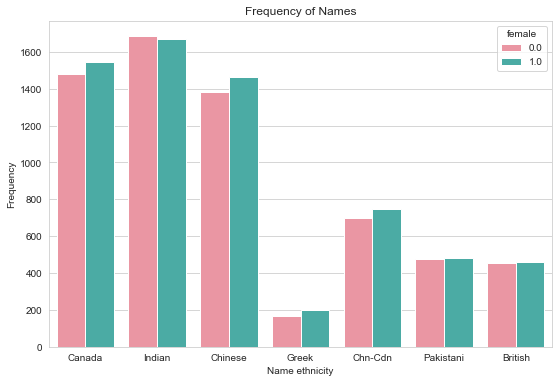

In [8]:
count_name_frequency()

<p style="text-align: justify">
Besides, Oreopoulos randomized each applicant's cover letter, residential address, telephone number and e-mail subjects as well as addresses in order to exclude similarities among sent resumes. Resume profiles were also randomized and attributed with general skills, such as "highly motivated" and "fast learner". Some skills were chosen specifically such as "six years experience in customer service and sales environment". As for characteristics, on average, all resumes are the same across description of job experience, years of schooling, style of resume, and cover e-mail.
</p>

<p style="text-align: justify">
In order to avoid repeating names sent to the same employer, some resumes were dropped and phone numbers or e-mail addresses were used to check that someone had not applied to this employer previously. The one to two side resumes were saved as pdf file and e-mailed to the employer. The employer's response was collected by setting multiple telephone numbers and two e-mail addresses for each applicant. As soon as an employer telephoned an applicant, an automatically generated message was sent to him. E-Mail responses were recorded and pass to a single e-mail address. A callback is defined as response if the employer specifically asked to contact them back (not just for clarification), an interview, if an interview was mentioned in the response. A second callback from the employer was rejected by telling them that the applicant already accepted another position. Moreover, skill variables for measuring writing-, speaking- and social abilities were added that range from 0 to 100 so as to determine the relationship between these skills and the probability for a callback. Comparisons of callback rates can identify relative effects of the different resume characteristics. 
</p>

<p style="text-align: justify">
The effect of the different Types and some characteristics on the callback rate can be pictured as a linear regression with the following form:
</p>


$$Y_{ijt} = \delta_0+\delta_1 Type_{ijt} + \delta_2 X_{ijt} + \delta_3[Type_{ijt} \times X_{ijt}] + v_t + e_{ijt}$$

> $Y_{ijt}$ is the indicator variable for whether resume i sent to job posting j in period t generated a call back. The type variable indicates the underlying type of the resume where type 0 was excluded. $X_{ijt}$ is a vector that comprises the characteristics. The model allows for interaction between Type and characteristics, which is useful in the sense that it can be estimated whether callback distinctions decrease when attributes are removed or added. $v_t$ is an indicator that states whether the resume was sent between April and August 2008, September and November 2009, and February and September 2009. Possible job heteroskedasticity is corrected.

Next, I am going to show the results of Oreopoulos by estimating $\{\delta_0,\delta_1,\delta_2,\delta_3\}$ using the OLS method that is implemented in python.

---
## Results

---

<p style="text-align: justify">
I divide this chapter into two parts. The first part is focusing on the results presented by Oreopoulos. There, I am going to replicate the most important results by using some in python implemented methods and a linear regression in order to estimate the effect of some characteristics on the callback rate. In the second part I will add my own analysis by using classification methods. After that, I will screen the quality of the classification and use further methods. 
</p>

### Results of Replication

<p style="text-align: justify">
The next table shows the main results from Oreopoulos. I followed his procedure. As he did, I have restricted the dataset by excluding all resumes with listed accreditation, local references or permanent status for comparability with resumes with featuring Canadian experience and education. The impact of these and further characteristics are computed afterwards. After restricting my attention to the dataset with respect to these attributes, I created a sample of 4000 resumes. Then, I estimated the different callback rates by resume type and name origin. For resumes with Greek name origins, I used a sample of 5000 resumes from the whole dataset that includes listed accreditation,
local references or permanent status, otherwise, since resumes with Greek names do not list these attributes, the callback rate of resumes with Greek name ethnicity would equal "nan". On this basis, the first results can be viewed in Result 1. My results differ a bit from Oreopoulos results but are consistent with its consequences. I suspect that the differences are due to the fact that I used a sample of 4000, respectively 5000 resumes. For comparison, the original results can be viewed in the .. file. 
</p>

<p style="text-align: justify">
Result 1. represents my outcomes of the callback (Cb) rates by type (T) and ethnic origin (N). The columns show all possible name origins. Unlike Oreopoulos, I have deliberately chosen not to present the callback ratios between type 0 and all other type resumes. The first index level lists all possible type levels while the second one pictures the underlying outcomes. The callback rate of a Type 1 resume with Pakistani name, for instance, equals <b>xx.xx</b> percent. Formally:     
</p>  

$$E[Cb = 1|N = Pakistani, T = 1] = xx.xx~\%$$

Changing only the name origin from Canada to Pakistani reduces the callback rate by <b>xx.xx</b> percent points and <b>xx.xx</b> percent. Formally:

$$E[Cb = 1|N = Pakistani, T = 1] - E[Cb = 1|N = Pakistani, S = 1] = xx.xx~\%$$

<p style="text-align: justify">
As one can see, this difference is highly significant. Switching Canadian name origin to Indian lowers the callback rate by <b>xx.xx</b> percent points, and switching it to Chinese lowers it by <b>xx.xx</b> percent points. Overall, resumes with English sounding names are <b>xx.xx</b> percent more likely to receive callbacks than resumes with Indian, Pakistani, or Chinese names. Also Greek names appear to generate lower callback rate compared to English names. The callback gap between English and Greek names is <b>xx.xx</b> and thus similar to the gap between English and other ethnic names as well as highly significant. Interestingly, just by changing the last name to Chinese the likelihood for a callback sinks by <b>xx.xx</b> percent points. The result is significant at the 5 percent level. Consequently, second generation immigrants that should be familiar with internal regularities and social norms do not improve the likelihood for a callback.
</p>  


<p style="font-size:15px"> Recall: </span>

> - **Type 0** : English name, Canadian education and Canadian experience
> - **Type 1** : Foreign name, Canadian education and Canadian experience
> - **Type 2** : Foreign name, Foreign education and Canadian experience
> - **Type 3** : Foreign name, Foreign education and Mixed experience
> - **Type 4** : Foreign name, Foreign education and Foreign experience



In [9]:
fourth_table()    #Erstelle Type 1 Tabelle

<p style="text-align: justify">
The difference in callbacks between Type 1 and Type 2 resumes differ just marginal. Hence, recruiters seem to value foreign education and native education equally since they do not care whether the applicants education is from a foreign institution or not. Conversely, job experience appears to matter a lot. Switching applicants from Type 2 to Type 4 reduces the callback rates drastically. Thus, given a Type 2 resume from the largest immigrant groups with Indian, Pakistani or Chinese name origin and just changing the job experience from Canadian to Foreign decreases the likelihood of getting a callback by <b>xx.xx</b> percent points. Just by adding some Canadian job experience and creating a resume with mixed job experience (from Type 4 to Type 3) increases the probability by <b>xx.xx</b> percent points. In fact, recruiters seem to highlight native job experience as well as name origin. Interestingly, resumes listing only British experiences do not lead to a significant decrease in recall rates compared to Canadian type 0 recalls ( <b>xx.xx</b> percent points). Oreopoulos assumes that if there are other unobservables that contribute to these differences, then adding additional information should reduce the call back gap.
</p>  

<p style="text-align: justify">
Before I present the next results of Oreopoulos I want to go trough some additional analysis. I used a sample of 6000 randomly picked resumes from the whole dataset to create the following results. First, I visualized the frequency of callback and no callback by Types. The next graph shows the underlying outcome. Clearly, most callbacks can be assigned to Type 0 resumes, while the lowest ones can be assigned to Type 4 resumes. Type 1 resumes have have by far the most rejections measured by non-callbacks followed by Type 0 resumes. For the rest the frequency is similar. From this graph it can not be concluded that Type 0 candidates have a better chance to get a callback since these values are not relatively given. 
</p>   

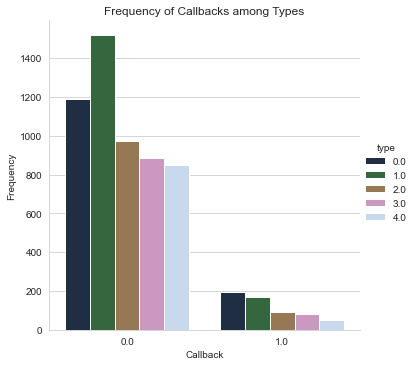

In [10]:
callback_graph()

<p style="text-align: justify">
Next, I am going to relative these results by computing the callback rates by Types regardless of other attributes. These rates are given below as an output. There appears to be a tremendous gap between Type 0 resumes and the remaining ones, to be precisely, <b>xx</b> for Type 0 compared to <b>xx</b> as Type 1, <b>xx</b> as Type 2, <b>xx</b> as Type 3 and <b>xx</b> as Type 4. 
</p>   

In [11]:
mean_callback_by_types()

In general, the callback rate equals 0.141 for Type 0, 0.102 for Type 1, 0.098 for Type 2, 0.078 for Type 3 and 0.065 for Type 4 resumes


<p style="text-align: justify">
In order to manifest the inferences, I have generated an OLS model whose output is depicted as Panel A1. The OLS outcome is quite identical to Oreopoulos first panel and shows the callback rate for type 0 and unconditional callback rate differences without controls. I defined the type indicator as categorical exogenous variable and the callback indicator as endogenous variable. Panel A1 clearly shows that the resumes type have a significant negative impact on the callback rates in all cases. The true model can formally be pictured as follows:
</p>

$$Y_i = \beta_0 - \beta_1 \times T_{1i} - \beta_2 \times T_{2i} - \beta_3 \times T_{3i} - \beta_4 \times T_{4i} + \epsilon_i$$

where $T_{ti} = 1$ if resumes $i$ type is $t$ for $t=\{1,2,3,4\}$. The estimated regression has the form of $Y=bT$, where $b$ is represented trough the coefficient below. 

$$ b = \begin{pmatrix} 0.142 & -0.037 & -0.041 & -0.070 & - 0.080 \end{pmatrix}^T$$

In [12]:
callback_types_ols()

             Panel A1: Callback Rate Differences without controls             
Dep. Variable:               callback   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     12.68
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.80e-10
Time:                        16:18:57   Log-Likelihood:                -1291.0
No. Observations:                6000   AIC:                             2592.
Df Residuals:                    5995   BIC:                             2626.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1417      0.008     17.

The estimated vector $b$ is highly significant on the one percent level. However, since R-squared is quite close to zero, the model does not explain much of the variance. The outcome tells us that by switching the type from zero to on the callback rate reduces by $b_1 = -0.037$ percent points. In the graph below one can see the callback rate as a function of resumes Type. Apparently and as already figured out, the graph has a negative slope.  

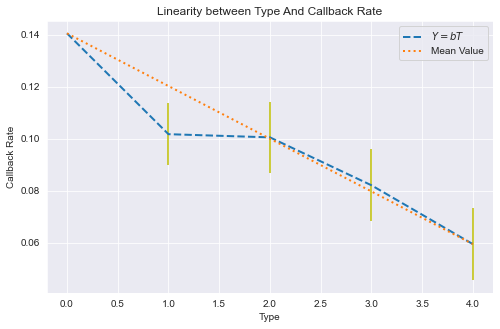

In [8]:
show_graph_callback_type()     # von allen Typen?

<p style="text-align: justify">
One could suppose that these callback distinctions are due to lack of skills as types become greater. But this does not happen to be the case. To prove this, I am going to replicate whether the callback gap remains the same, when conditioning on whether the applicant is female, graduated from a top 200 world ranked university (according to the 2008 QS University World Rankings), listed active social extracurricular activities (e.g., volunteer work), fluency in French, English and a mother tongue (applicable for Indian and Chinese named resumes), graduated with a occupation related Canadian master's degree, with job experience from large, prestigious-national firms or with Multinational firms with establishments in all three countries, listed a reference with a Canadian phone number, listed education accredited by the Canada International Skill Certification Board (resume Types 2, 3, and 4 resumes only), or listed legal permanent residency status (Types 2, 3, and 4 resumes only) information. Panel A2 shows the callback rate between type 0 resumes and other types with these dummy variable controls. The results clearly indicate that conditioning on these factors overall has virtually no impact on the callback rate by name, source country of education or experience.
</p>
<p style="text-align: justify">
I used a sample that just includes resumes that list these characteristics. Moreover, for Panel A2 I just considered occupations that require similar speaking, social and writing skills (pointed between 60 and 80). Again, my results are quite similar to Oreopoulos ones. Hence, according to Panel A2, in compliance with whether resumes include or exclude the specified information has no role in the impact name, country of education or experience, has on the likelihood of a response.
</p>

In [6]:
callback_types_ols_conditioning()

              Panel A2: Callback Rate Differences with controls               
Dep. Variable:               callback   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.93
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.24e-09
Time:                        15:56:56   Log-Likelihood:                -827.21
No. Observations:                4000   AIC:                             1664.
Df Residuals:                    3995   BIC:                             1696.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1477      0.010     15.

<p style="text-align: justify">
One could argue that there may be a multicollinearity problem such that some independent variables are highly correlated with each other. Then we have a set of observations for which the correlated variables have a particular linear stochastic relationship. In fact, if all independent variables correlate with each other, all collinear variables contain the same information about the dependent variable. Then all variables except one are redundant and can be excluded for the estimation of the conditional effect. But as seen in the correlation matrix below, the correlation among all attributes is close to zero between almost every attribute. Hence, it can be said that every attribute quantify different informations. (Quelle einfügen)
</p>

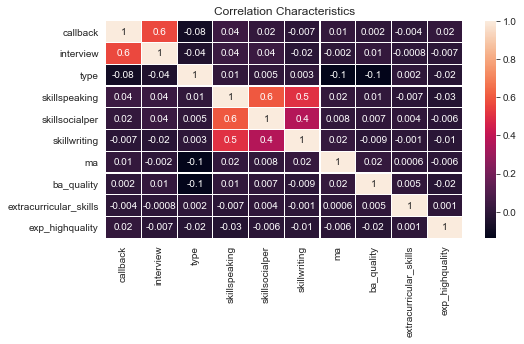

In [15]:
corr_map()

<p style="text-align: justify">
The next table shows the estimated effect of listing each trait for each resume type separately and the values are again identical to the from Oreopoulos provided ones. Listing language fluency improves the relative callback rate for types 1, 2 and 4 resumes. Listing multiple language fluency improves the callback rate by <b>4.5</b> percent points compared to a <b>1.8</b> percent points improvement for type 0 resumes. These results are significant on the 5 percent level. I also found, as Oreopoulos did, improvement in callback rates for Type 1 resumes from listing extracurricular activities (<b>1.2 percent points)</b> but not for the other types. Listing a bachelor degree from a higher ranked school appears to improve the callback rate for type 0 resumes. For the rest, the coefficients are not statistically significant. The same applies to adding a Canadian master degree. Listing Canadian references, accreditations or permanent resident does not significantly change the likelihood for getting a callback. In fact, the point estimates are all close to zero. Being a female especially improves the callback rate for type 1 resumes (<b>4.8</b> percent points). Among the remaining Types, the effect of being a female on the callback likelihood is not significantly. As Oreopoulos pointed out, one explanation for this finding is that recruiters have difficulty spotting female applicants among resumes with Chinese-, Indian-, or Pakistani- named applicants although the cost to spot an applicant's gender, by phone call for example, is also not large. Another explanation for this callback surplus for type 0 resumes is simply that recruiters prefer to interview English-named applicants, especially females.
</p>

In [16]:
fifth_table()

<p style="text-align: justify">
Different professions require different skills and qualification levels. For example, the ability to express and communicate orally required for a specific occupation is higher for lawyers according to <a href="https://www.onetonline.org">O*net</a> (71 out of 100) than it is for web developers (51 out of 100). Poets require higher writing skills (82 out of 100) than Sales Managers (57 out of 100). First of all, it would be interesting to find out whether the occupational requirements for language, writing and social skills are similar across all types. For this purpose the original data set is to be reduced to a sample of 6000 resumes. Afterwards all occupations whose language, writing or social requirements were assessed with less than 10 points are removed as outliers. The results are shown below using a box plot. A distinction is also made between applications that received a callback and those that did not.
</p>

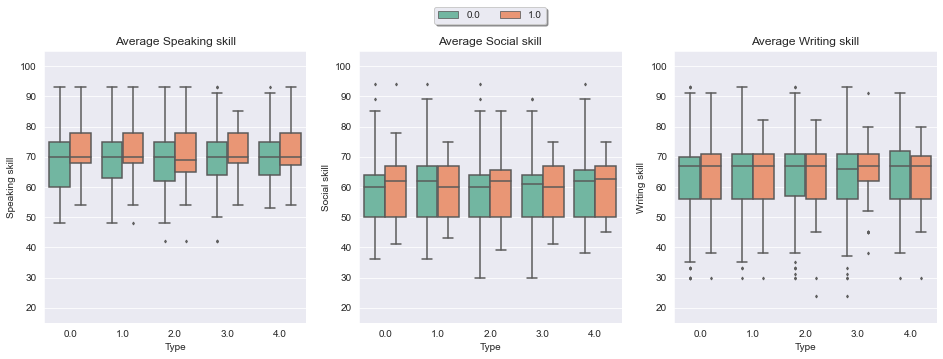

In [17]:
get_skill_differences()

<p style="text-align: justify">
From this output, it can be clearly stated that the requirements do not differ between the different types. On average, the requirements are identical, which is due to the random allocation. Interestingly, there is only a difference in required speaking skills between the applicants who received a call and those who did not. One explanation for this could be that the pool of applicants for such occupations tends to be smaller, with demand for workers being comparatively similar to that in the other sectors, which is why, in relative terms, the recruitment rate for jobs with relatively high speaking requirements is higher.
</p>

<p style="text-align: justify">
Continuing with the next replication of Oreopouloses results and in order to estimate whether the difference in callback rates by Types offsets for jobs that do not require skills for which in Canada born candidates have a natural advantages, it remains to be shown how callback rates differ after separating the sample by jobs applied that require above or below median language and social skills. It will be investigated whether employers who try to hire in occupations that require more intensive language or social skills are even less likely to interview immigrants because they fear that they have fewer of these skills than natives. Oreopoulos matched each job description with measures of speaking, writing and social O*NET defined professional qualification requirements and added these values. Then he runs separate regressions for each decile to test name differences between type 0 resumes with English names and type 1 resumes with Chinese, Indian, or Pakistani names. The results presented as Result 3 follow the same procedure.
</p>

<p style="text-align: justify">
I have constructed 10 quantiles by required social,- speaking- and writing skills. For the occupations Electrical Engineer, Maintenance Technician and Programmer, for example, language and social requirements are lowest (lie in the 0.1 quantile). In contrast, Insurance as well as Marketing and Sales occupations require high language and social abilities (lie in the 0.9 quantile). So, the smaller the decile, the lower the language and social ability requirements. For the job titles see notes or run the function <i>which_occupations</i>. I have used a sample of 5000 resumes to generate the outcome.
</p>

**Note:**
> - EE, MT, P  :   Electrical Engineer, Maintenance Technician, Programmer
> - CE, Tec : Civil Engineer, Technology
> - Acc, MA : Accounting, Media and Arts
> - EA : Executive Executive Assistant
> - Adm, F: Administrative, Finance
> - FSM, Pr: Food Services Managers, Production
> - EcR, R: Ecommerce, Retail
> - Cl, HR: Clerical, Human Resources Payroll
> - In, MS: Insurance, Marketing and Sales
> - BPh, Ed, SW: Biotech and Pharmacy, Education, Social Worker

In [18]:
sixth_table()

<p style="text-align: justify">
It still happens to be the case that the name origin plays an important role in the choice of the applicant, however overall my results are not significant anymore. Yellow marked cells denote significant values while red values represent negative effects on callback rates by switching the name from English to foreign (type 0 to type 1) that are higher than 5 percent points. Interestingly, name discrimination seem to appear especially in administrative and financial occupations. There, a foreign named resume decreases the callback rate by tremendous <b>xx.xx</b> percent points compared to an English one. This impact is highly significant. As predicted, it is observable that occupations that demand higher language and social abilities tend to discriminate more by name origin. However, the discrimination is not significant. My P values differ from Oreopoulos' own, but are consistent with his conclusions. Curiously, he uses sample occupations such as "Bookeeper" or "Receptionist" that can not be found in the dataset, respectively are not given as occupation category. The difference in results may attribute to the different sample occupations.
</p>


### Results of Extension

Here, I am going to execute further analysis by using some supplementary models. The first method that will be used is the regression estimation of causal effects. I want to check whether the difference is still significant if specific groups are considered. Then, I am going to use the supervised K-nearest neighbor method. This method shall be used in order to evaluate the previous findings. The callback indicator shall serve as classification variable. 

#### Regression estimators of causal effects

The aim of this chapter is to check the difference between the estimated callback rates, which only reflect the  candidates who have all the attributes (fluency in English and French, additional extra-curricular activities, experience in international companies, etc.) and the estimated callback rate of those candidates who do not satisfy any of these attributes. I have defined two samples of the size of 250 resumes, one that explicitly lists all attributes and one that does not list any of them. The difference is pictured in the next graph. 

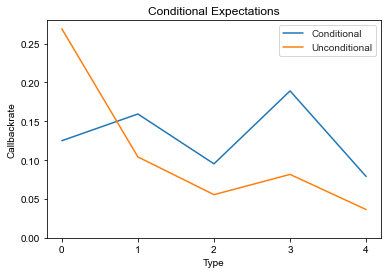

The naive estimation for the name discrimination equals 0.17, while the true name discrimination equals -0.03


In [3]:
plot_cond_uncond()

As expected, it can clearly be said that conditioning on all attributes does reduce the callback gap between type 0 resumes and the remaining ones. In this case, after conditioning on all attributes, type 2 applicants do similarly good as type 0 candidates and name are not as important as before. Formally:

$$E[Cb|A_i=1,T=0 ~\forall i] - E[Cb|A_i=1,T=1~\forall i] < E[Cb|A_i=0,T=0~\forall i] - E[Cb|A_i=0,T=1~\forall i],$$

where $A_i$ is the underlying attribute (for example international job experience). Nevertheless, the resumes type effect is still negative. However, the difference is not significant anymore as seen in the panel below.

In [5]:
df_cond, df_uncond = cond_uncond()
print(smf.ols("callback~C(type)", data=df_cond).fit().summary(title="Panel B: Conditional Regression"))

                       Panel B: Conditional Regression                        
Dep. Variable:               callback   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.703
Date:                Sun, 21 Jun 2020   Prob (F-statistic):              0.150
Time:                        17:42:25   Log-Likelihood:                -58.818
No. Observations:                 250   AIC:                             127.6
Df Residuals:                     245   BIC:                             145.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1897      0.041      4.

#### Supervised Classification 

Now, I am focusing on the K-Nearest-Neighbor Method in order to acquire a understanding of whether the resumes can be classified in those that generated a callback and those that did not. For this, I have ex ante defined the two classes (callback, no callback) and split the 8000 big sample of the origin dataset into train and test samples where 33 percent were assigned to the train sample. The train sample is used to fit the model. After fitting the model, the goodness is going to be evaluated by comparing the prediction of the model with the true outcomes. As independent variable all numerical characteristics were taken into account. As evaluation the classification report is used.

In [6]:
knn_method()

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      2681
         1.0       0.17      0.01      0.02       289

    accuracy                           0.90      2970
   macro avg       0.53      0.50      0.48      2970
weighted avg       0.83      0.90      0.86      2970



Although $k$ is chosen such that the error term is minimized (see graph below), the weighted average of correct predictions equals 89 percent. However, considering the fact that 2669 out of 2970 resumes got a callback, the weighted average is meaningless. The macro average is better suited for evaluating the method. Taking this into account, just every 50 percent of the resumes were assigned correctly. The KNN-method is doing quite bad especially in detecting resumes that lead to a callback. For choosing the amount of k nearest neighbors I have used the elbow method. The optimal $k$ value minimizes the average error term of the prediction and has to be as small as possible. In this case, I have chosen $k=6$ as the optimal value. 

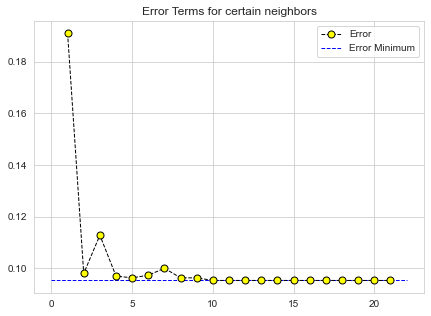

In [7]:
error_term()

Therefore, a classification into applicants who received one or no recall, taking into account the types, by means of the KNN method is inappropriate. The KNN regression is also very imprecise in predicting whether the person will receive a callback or not. For the next graph I have again split a sample of 8000 resumes into train and test groups. After fitting the model with the train data, I have predicted the test data given the resumes type and have compared the callback predictions. The predictions are graphically given below. As one can see, the KNN regression predicts that type 0 and 1 applicants have the best chances to generate a callback. This supports the findings of Oreopoulos. Surprisingly, the accuracy of the prediction is quite high. 70 percent of the callbacks were predicted correctly. However, considering again the weight of the resumes that did not generate callbacks, the accuracy is meaningless.

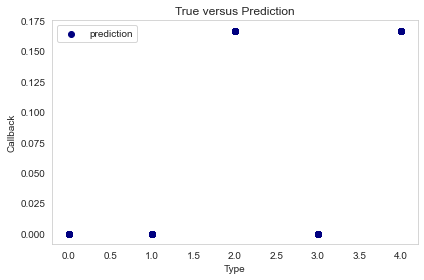

The accuracy of the KNN-Regression is 0.40583


In [8]:
prediction_true_vis()

---
## Discussing Results with Recruiters

---

<p style="text-align: justify">
After founding significant levels of name discrimination (Panel A1, A2) 300 employers were randomly mailed to gain perspective from the recruiters themselves about what they think drives the results. The focus lies on Chinese, Indian, and Pakistani name discrimination. In the mails was also noted that listing extra characteristics did not significantly affect the findings. $25 amazon gifts for response were used anonymously as an incentive. Only 29 recruiters responded. Completely, recruiters treat name, country of education or experience as a signal that an applicant may lack critical language skills for the job. However, they were not able to address specifically reasons after they were asked why identical resumes except for name would generate a different response. A typical response was:
</p>

> "A good recruiter will call everyone because there may be times that people aren’t represented as you’d picture them from their resume. When you’re calling someone with an English sounding name, you know what you’re getting into. You know that you can call Bob Smith, and you can talk to him as quickly as you want to. It’s less work because you know that his English will be fine. It also indicates that he’s white looking. The brown guy who was born here is not less desirable in the workplace, but it takes something more to know for sure that he speaks English without an accent. We’d have to make a phone call and test the water".

---
## Conclusion

---

<p style="text-align: justify">
Summing up, the results in this notebook support the findings reported by Oreopoulos (2011). Thanks to the provided data description I was able to replicate all results. I can just support his three main descriptive findings. First, Type 0 resumes are significant more likely to receive callbacks for a job compared to the remaining Type resumes. Applicants with foreign names, job experience and education are up to xx.xx percent less likely to generate a callback compared to in Canadian born applicants with an English name, Canadian education and job experience. Hence, higher unemployment rates for immigrants can be attributed to the fact that immigrants do not make it to the interview.
</p>    
<p style="text-align: justify">
Second, Canadian job experience is more valued as Canadian education and foreign experience. Switching Type 2 resumes to Type 4 ones leads to a drop of nearly xx percent in callback rates. Thus, it can be argued that recruiters are more interested in immigrants that have Canadian job experiences. A political intervention that helps match immigrants with open jobs could boost immigrants employment rates and offset callback rates. Listing additional characteristics such as a Canadian master's degree or coming from a high ranked university does not appear to significantly increase the likelihood for a callback. Recruiters were not surprised and justified this behavior by arguing that education plays only a minor role once an applicant has accumulated four to six years of experience.
</p>    

<p style="text-align: justify">   
Lastly, employers discriminate by name. Callback rates seem to significantly drop when switching from a resume with an English name to an identical resume with a Chinese, Indian, Pakistani or even Greek name. This difference is significant (xx compared to xx). In fact, even adding information related to important characteristics does not significantly reduce the degree of discrimination. 
</p>

<p style="text-align: justify">   
Recruiters that responded did not address the opportunity that additional informations on the resume could offset language concerns. Some recruiters seem to be biased and mistakenly assume that applicant with foreign names implied an immigrant with a lack of language skills. Those who did address language concerns, failed to mention additional attributes that could potentially offset these concerns. As Oreopoulos emphasised, the problem could be solved by political intervention by masking the names of applicants before actually interviewing them. Another implication is to develop hiring policies that involve contacting marginal applicants to initially assess language abilities, when in doubt. However, it should not be ignored that some recruiters have legitimate concerns about the productivity of an applicant. Therefore, one cannot generally conclude that employers are subject to prejudice.
</p>

<p style="text-align: justify"> 
Last but not least, I would like to give my opinion on the subject. I have nothing against the measure proposed by x regarding the anonymization of applications. However, I tend to believe that additional regulatory measures could complicate the problem of discrimination and trigger unforeseen negative effects. Therefore, if one dares to take such action, one should start with the smallest possible sample of companies. I am also firmly convinced that legal reforms concerning recruitment and dismissal processes make it more difficult to mitigate discrimination. After all, on the premise that recruiters associate recruitment with monetary resources, it is perfectly understandable that they should decide for and against applicants on the basis of given signals, even if these decisions may be subject to prejudice. In my view, a more clever solution would be not to fight prejudice, but to mitigate the damage of the mistaken attitude resulting from the company's point of view. Reducing regulatory barriers, for example, could make the labour market more dynamic so that employers can respond immediately to mistakes in recruitment. As a result, companies would tend to be able to hire and fire a large number of applicants at the same time due to the low hiring costs. As a result, recruiters would be less afraid of hiring the wrong person and could be more willing to take risks. Similarly, applicants would also have more freedom on the labour market, because regardless of the productivity signal from various achievements, several applicants would have the opportunity to assert themselves in the company.
</p>



---
<span style="font-size:26px"><b>References</b></span> 

---

- <b>Philip Oreopoulos (2011)</b>. *Why do skilled immigrants struggle in the Labor Market? A Field Experiment with Thirteen Thousand Resumes*. American Economic Journal: Economic Policy 3: 148–171.
- <b>Marianne Bertrand and Sendhil Mullainathan (2004)</b>. *Are Emily and Greg More Employable Than Lakisha and Jamal? A Field Experiment on Labor Market Discrimination.* AMERICAN ECONOMIC REVIEW VOL. 94, NO. 4, 991-1013.

